In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

In [3]:
train_data_file = 'data/zhengqi_train_pca_16.pkl'
test_data_file = 'data/zhengqi_test_pca_16.pkl'

train_data_pca_16 = pd.read_pickle(train_data_file)
test_data_pca_16 = pd.read_pickle(test_data_file)

In [5]:
train_data_pca_16 = train_data_pca_16.fillna(0)
train = train_data_pca_16[test_data_pca_16.columns]
test = test_data_pca_16
target = train_data_pca_16['target']

#切分数据 8:2
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 0)

## 多元线性回归模型

In [9]:
clf = LinearRegression()
clf.fit(X_train, y_train)
score = mean_squared_error(y_test, clf.predict(X_test))
print('LinearRegression: ', score)

LinearRegression:  0.27169745706433185


In [16]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test, n_sample = 100):
    """
    绘制学习曲线：只需要传入算法(或实例对象)、X_train、X_test、y_train、y_test
    当使用该函数时传入算法，该算法的变量要进行实例化，如：PolynomialRegression(degree=2)，变量 degree 要进行实例化
    n_sample为采样率
    """
    train_score = []
    test_score = []
    step = len(X_train) // n_sample

    for i in range(step, len(X_train) + 1, step):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(train_score)+1)], train_score, label="train")
    plt.plot([i for i in range(1, len(test_score)+1)], test_score, label="test")
    
    plt.legend()
    plt.show()

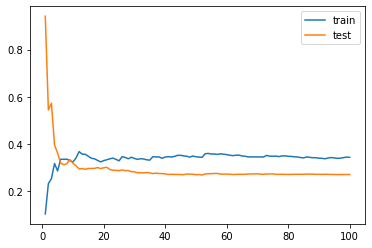

In [20]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test, n_sample = 100)

## KNN回归

In [21]:
for i in range(3, 10):
    clf = KNeighborsRegressor(n_neighbors = i)
    clf.fit(X_train, y_train)
    score = mean_squared_error(y_test, clf.predict(X_test))
    print('KNNRegression k = ', i, ': ', score)

KNNRegression k =  3 :  0.2675823902345252
KNNRegression k =  4 :  0.269846370782872
KNNRegression k =  5 :  0.26602971584775087
KNNRegression k =  6 :  0.2747315135524798
KNNRegression k =  7 :  0.27794443340865754
KNNRegression k =  8 :  0.27300318049848615
KNNRegression k =  9 :  0.27593168187449274


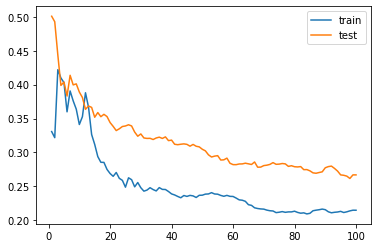

In [22]:
plot_learning_curve(KNeighborsRegressor(n_neighbors = 5) , X_train, X_test, y_train, y_test, n_sample = 100)

## 决策树回归

In [24]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
score = mean_squared_error(y_test, clf.predict(X_test))
print('DecisionTreeRegression: ', score)

DecisionTreeRegression:  0.6034572733564014


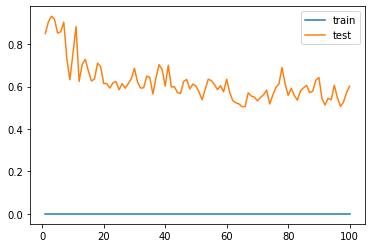

In [25]:
plot_learning_curve(DecisionTreeRegressor(), X_train, X_test, y_train, y_test, n_sample = 100)

## 随机森林回归

In [26]:
clf = RandomForestRegressor(n_estimators = 200)
clf.fit(X_train, y_train)
score = mean_squared_error(y_test, clf.predict(X_test))
print('RandomForestRegression: ', score)

RandomForestRegression:  0.25197793586115913


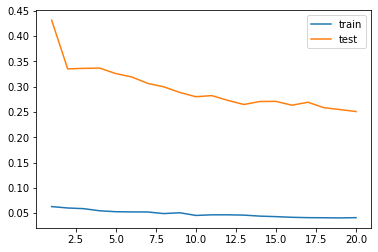

In [28]:
plot_learning_curve(RandomForestRegressor(n_estimators = 200), X_train, X_test, y_train, y_test, n_sample = 20)

## Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

myGBR = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                                  learning_rate=0.03, loss='huber', max_depth=14,
                                  max_features='sqrt', max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=10, min_samples_split=40,
                                  min_weight_fraction_leaf=0.0, n_estimators=300,
                                  presort='auto', random_state=10, subsample=0.8, verbose=0,
                                  warm_start=False)
myGBR.fit(X_train, y_train)
score = mean_squared_error(y_test, myGBR.predict(X_test))
print('GradientBoostingRegression: ', score)

GradientBoostingRegression:  0.2407863908148907


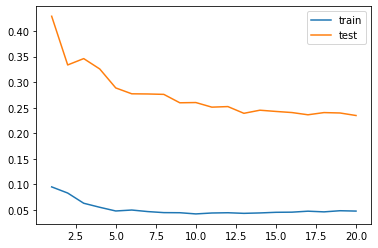

In [30]:
myGBR = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                                  learning_rate=0.03, loss='huber', max_depth=14,
                                  max_features='sqrt', max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=10, min_samples_split=40,
                                  min_weight_fraction_leaf=0.0, n_estimators=300,
                                  presort='auto', random_state=10, subsample=0.8, verbose=0,
                                  warm_start=False)

plot_learning_curve(myGBR, X_train, X_test, y_train, y_test, n_sample = 20)

## LightGBM回归

In [39]:
dtrain = lgb.Dataset(X_train, y_train, free_raw_data = True)
dtest = lgb.Dataset(X_test, y_test, free_raw_data = True)

params={'boosting':'gbdt',
        'objective': 'regression',
        'metric': 'mse',
        'train_metric': True,
        'n_jobs': -1,
        'learning_rate': 0.01,
        'max_depth': 4,
        'feature_fraction': 0.8,
        'feature_fraction_seed': 0,
        'bagging_fraction':0.8,
        'bagging_freq': 2,
        'bagging_seed': 0,
        'lambda_l1': 1,
        'lambda_l2': 1,
        'verbosity': 1}

model = lgb.train(params, dtrain, 
                  num_boost_round = 3000, 
                  valid_names = ['train', 'eval'], valid_sets = [dtrain, dtest], 
                  early_stopping_rounds = 50, verbose_eval = 200)
score = mean_squared_error(y_test, model.predict(X_test))
print('LGBRegression: ', score)

Training until validation scores don't improve for 50 rounds.
[200]	train's l2: 0.305772	eval's l2: 0.34104
[400]	train's l2: 0.215114	eval's l2: 0.270646
[600]	train's l2: 0.179567	eval's l2: 0.251444
[800]	train's l2: 0.158513	eval's l2: 0.244374
[1000]	train's l2: 0.14317	eval's l2: 0.240971
[1200]	train's l2: 0.129577	eval's l2: 0.239258
[1400]	train's l2: 0.117916	eval's l2: 0.237092
[1600]	train's l2: 0.107854	eval's l2: 0.236208
Early stopping, best iteration is:
[1555]	train's l2: 0.10985	eval's l2: 0.236035
LGBRegression:  0.23603504821849092
